# Visualiser des données avec Matplotlib

Nous importons les librairies Pandas et Numpy :

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib
%matplotlib inline



## Graphiques de ligne

In [4]:
p = pd.DataFrame(np.random.randn(100,1))

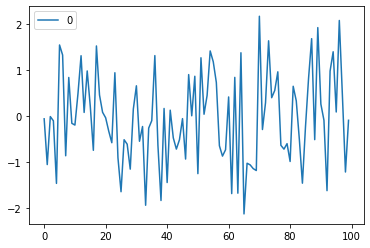

In [5]:
p.plot()

In [6]:
coffee = pd.read_csv("data/coffee_shop.csv", 
                     parse_dates = True, 
                     index_col=1)

In [7]:
coffee.head(3)

,Area Code,Market,Market Size,Product,Product Line,Product Type,State,Type,Inventory,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Margin,Marketing,Profit,Sales,Total Expenses
Date,,,,,,,,,,,,,,,,,,,
2013-12-01,985,South,Small Market,Colombian,Beans,Coffee,Louisiana,Regular,845,50,90,70,140,49,71,13,68,128,25
2013-12-01,985,South,Small Market,Chamomile,Leaves,Herbal Tea,Louisiana,Decaf,540,80,110,70,190,94,120,31,114,228,43
2013-11-01,985,South,Small Market,Chamomile,Leaves,Herbal Tea,Louisiana,Decaf,552,90,120,80,210,101,130,33,126,246,45


In [8]:
coffee_s = coffee['Sales'].groupby(coffee.index).sum()

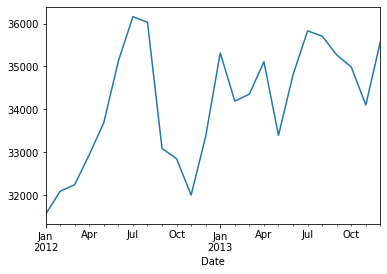

In [9]:
coffee_s.plot()

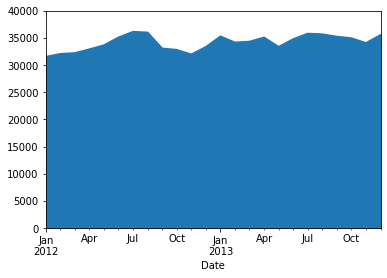

In [10]:
coffee_s.plot(ylim=[0,40000],kind='area')

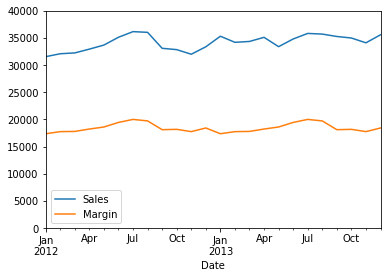

In [11]:
grouped_sm = coffee[['Sales','Margin']].groupby(coffee.index).sum()

grouped_sm.plot(ylim=[0,40000])

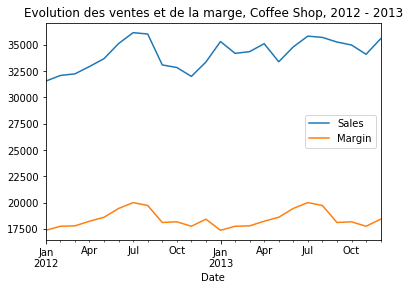

In [12]:
grouped_sm.plot(title='Evolution des ventes et de la marge, Coffee Shop, 2012 - 2013')

-  je vais afficher l'évolution mensuelle de la marge et des dépenses
-  et afficher l'évolution trimestrielle du profit 

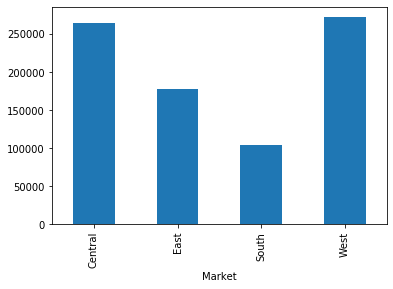

In [13]:
grouped_m = coffee['Sales'].groupby(coffee['Market']).sum()

grouped_m.plot(kind='bar')

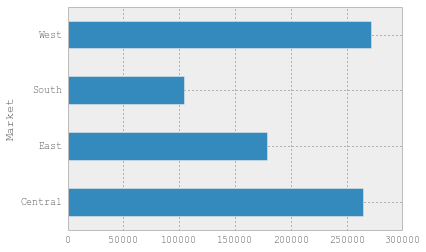

In [40]:
grouped_m.plot(kind='barh')

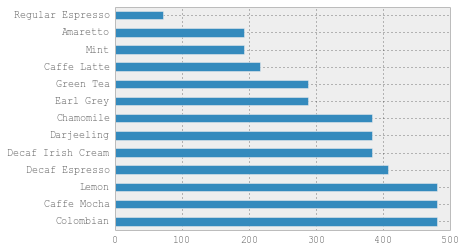

In [41]:
coffee['Product'].value_counts().plot(kind='barh')

Je peux également afficher plusieurs dimensions sur un graphe en bâton. 

Prenons l'exemple des marchés, nous pouvons réaliser un grouping sur deux clés, et afficher la part des Major / Small markets au sein de chacun des Market (East, Central, West, South)

In [14]:
coffee_mm = coffee['Sales'].groupby([coffee['Market'], coffee['Market Size']]).sum()

coffee_mm

Market   Market Size 
Central  Major Market    152579
         Small Market    112466
East     Major Market    138260
         Small Market     40316
South    Major Market     37410
         Small Market     66516
West     Major Market     96892
         Small Market    175372
Name: Sales, dtype: int64

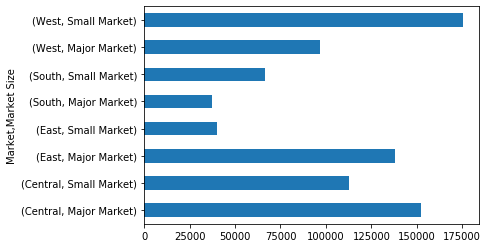

In [15]:
coffee_mm.plot(kind='barh')

je peux faire **pivoter** ce graphe, grâce à la fonction **unstack** : 

In [16]:
coffee_mm.unstack()

Market Size,Major Market,Small Market
Market,,
Central,152579,112466
East,138260,40316
South,37410,66516
West,96892,175372


Ce qui en graphe donne : 

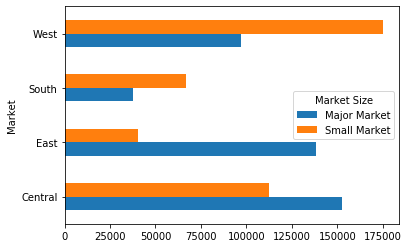

In [17]:
coffee_mm.unstack().plot(kind='barh')

Nous pouvons enfin 'empiler' chacun de ces graphes, grâce au paramètre **stacked** : 

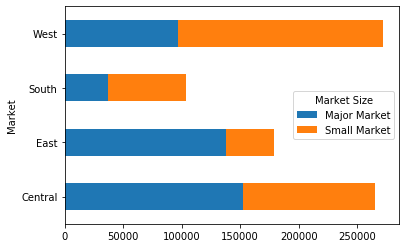

In [18]:
coffee_mm.unstack().plot(kind='barh', stacked=True)

- je vais créer un graphe en bâton affichant la part des ventes, des Espresso ou des Coffee par type (Decaf ou Regular)

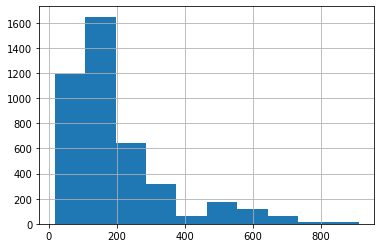

In [19]:
coffee['Sales'].hist()

Nous pouvons modifier le nombre de classes, grâce au paramètre **bins** : 

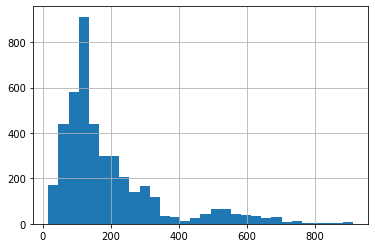

In [20]:
coffee['Sales'].hist(bins=30)

## Nuages de points

In [21]:
df = pd.DataFrame(np.random.rand(100,2))

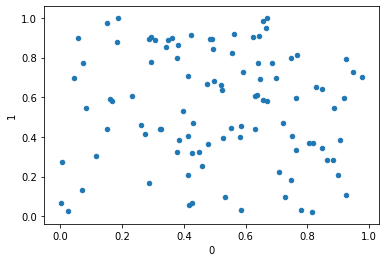

In [22]:
df.plot(kind='scatter',x=0,y=1)